# HOMEWORK 3 Programming part_ YUANJUN GE

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#### 2.1

In [101]:
train_df=pd.read_csv('./hw3Data/D2z.txt', header=None, sep=' ', names= ["x1", "x2", "y"])

In [102]:
def euclidean_dis(x1,x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def oneNN(trainData: pd.DataFrame, testData: pd.DataFrame):
    trainX = trainData.iloc[:,:-1].values
    trainY =  trainData.iloc[:,-1].values
    
    testData = testData.values
    predicted_labels = []

    for sample in testData:
        distances = [euclidean_dis(x, sample) for x in trainX]
        near_index = np.argmin(distances)
        predicted_labels.append(trainY[near_index])
        
    return  predicted_labels 



In [103]:
df1 = pd.DataFrame(np.arange(-2,2.1,0.1))
test_df = df1.merge(df1, how='cross')
prediction = oneNN(train_df,test_df)

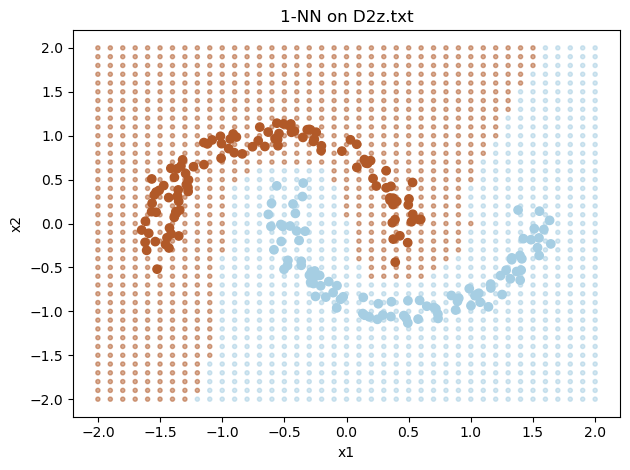

In [104]:
plt.scatter(x=test_df.iloc[:,0].values,y=test_df.iloc[:,1].values, c=prediction, cmap=plt.cm.Paired, alpha=0.5, marker='.')
plt.scatter(x=train_df['x1'], y=train_df['x2'], c=train_df['y'], cmap=plt.cm.Paired, alpha=1, marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('1-NN on D2z.txt')
plt.tight_layout()
plt.show()

#### 2.2

In [105]:
emails = pd.read_csv('./hw3Data/emails.csv')
emails_df = pd.read_csv('./hw3Data/emails.csv').drop('Email No.', axis=1)

In [106]:
def report(true_labels, predicted_labels):
    TP, TN, FP, FN = 0, 0, 0, 0
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))

    accuracy = (TP+TN)/ (TP+TN+ FP +FN)
    precision = TP/ (TP+ FP) if (TP+ FP) > 0 else 0
    recall = TP/ (TP+ FN) if (TP+ FN) > 0 else 0
    report = {
        "Accuracy": accuracy, "Precision": precision, "Recall": recall
    }
    return report

In [107]:
print("fold1:",report(emails_df.iloc[0:1000,-1].values, np.array(oneNN(emails_df.iloc[1000:,:],emails_df.iloc[0:1000,:-1]))))
print("fold2:",report(emails_df.iloc[1000:2000,-1].values, np.array(oneNN(pd.concat([emails_df.iloc[0:1000,:],emails_df.iloc[2000:,:]]),emails_df.iloc[1000:2000,:-1]))))
print("fold3:",report(emails_df.iloc[2000:3000,-1].values, np.array(oneNN(pd.concat([emails_df.iloc[0:2000,:],emails_df.iloc[3000:,:]]),emails_df.iloc[2000:3000,:-1]))))
print("fold4:",report(emails_df.iloc[3000:4000,-1].values, np.array(oneNN(pd.concat([emails_df.iloc[0:3000,:],emails_df.iloc[4000:,:]]),emails_df.iloc[3000:4000,:-1]))))
print("fold5:",report(emails_df.iloc[4000:,-1].values, np.array(oneNN(emails_df.iloc[0:4000,:],emails_df.iloc[4000:,:-1]))))

fold1: {'Accuracy': 0.825, 'Precision': 0.6544943820224719, 'Recall': 0.8175438596491228}
fold2: {'Accuracy': 0.853, 'Precision': 0.6857142857142857, 'Recall': 0.8664259927797834}
fold3: {'Accuracy': 0.862, 'Precision': 0.7212121212121212, 'Recall': 0.8380281690140845}
fold4: {'Accuracy': 0.851, 'Precision': 0.7164179104477612, 'Recall': 0.8163265306122449}
fold5: {'Accuracy': 0.775, 'Precision': 0.6057441253263708, 'Recall': 0.7581699346405228}


#### 2.3

In [108]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def LogisticRegression(train:pd.DataFrame, test:pd.DataFrame ,lr:float, iterations:int):
    trainX = train.iloc[:,:-1].values
    trainY = train.iloc[:,-1].values
    testX = test.iloc[:,:-1].values
    testY = test.iloc[:,-1].values

    theta = np.zeros(trainX.shape[1])

    for i in range(iterations):
        z = np.dot(trainX,theta)
        y_hat = sigmoid(z)
        gradient = np.dot(trainX.T, (y_hat-trainY)) /len(y_hat)
        theta -= lr * gradient

    predictions = (sigmoid(np.dot(testX,theta)) >=0.5).astype(int)
    return report(testY,predictions)
    




In [109]:
print("fold1: ", LogisticRegression(emails_df.iloc[1000:,:],emails_df.iloc[0:1000,:],0.01,3000))
print("fold2: ", LogisticRegression(pd.concat([emails_df.iloc[0:1000,:],emails_df.iloc[2000:,:]]),emails_df.iloc[1000:2000,:],0.01,3000))
print("fold3: ", LogisticRegression(pd.concat([emails_df.iloc[0:2000,:],emails_df.iloc[3000:,:]]),emails_df.iloc[2000:3000,:],0.01,3000))
print("fold4: ", LogisticRegression(pd.concat([emails_df.iloc[0:3000,:],emails_df.iloc[4000:,:]]),emails_df.iloc[3000:4000,:],0.01,3000))
print("fold5: ", LogisticRegression(emails_df.iloc[0:4000,:],emails_df.iloc[4000:,:],0.01,3000))


/var/folders/1t/hlxzcgws7rnb1gf_3n3b07140000gn/T/ipykernel_44960/2389384541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


fold1:  {'Accuracy': 0.933, 'Precision': 0.9291338582677166, 'Recall': 0.8280701754385965}
fold2:  {'Accuracy': 0.935, 'Precision': 0.9015151515151515, 'Recall': 0.8592057761732852}
fold3:  {'Accuracy': 0.92, 'Precision': 0.9047619047619048, 'Recall': 0.8028169014084507}
fold4:  {'Accuracy': 0.926, 'Precision': 0.8928571428571429, 'Recall': 0.8503401360544217}
fold5:  {'Accuracy': 0.898, 'Precision': 0.8953488372093024, 'Recall': 0.7549019607843137}


#### 2.4

In [110]:
def kNN(trainData: pd.DataFrame, testData: pd.DataFrame, k: int):
    trainX = trainData.iloc[:,:-1].values
    trainY =  trainData.iloc[:,-1].values
    
    testData = testData.values
    predicted_labels = []

    for sample in testData:
        nearest_neighbors = []
        
        for i, train_sample in enumerate(trainX):
            distance = euclidean_dis(train_sample, sample)
            nearest_neighbors.append((i, distance))
        
        # Sort the neighbors by distance and select the top k
        nearest_neighbors.sort(key=lambda x: x[1])
        k_neighbors_indices = [i for i, _ in nearest_neighbors[:k]]
        
        # Extract the labels of the k nearest neighbors
        k_neighbor_labels = trainY[k_neighbors_indices]
        
        # Find the most common label among the neighbors
        unique_labels, label_counts = np.unique(k_neighbor_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
        predicted_labels.append(predicted_label)
    return  predicted_labels 

def report_accuracy(true_labels, predicted_labels):
    TP, TN, FP, FN = 0, 0, 0, 0
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))

    accuracy = (TP+TN)/ (TP+TN+ FP +FN)
    return accuracy

In [111]:
k = [1,3,5,7,10]
avg_accuracy = []
for each in k:
    a=[]
    a.append(report_accuracy(emails_df.iloc[0:1000,-1].values, np.array(kNN(emails_df.iloc[1000:,:],emails_df.iloc[0:1000,:-1],each))))
    a.append(report_accuracy(emails_df.iloc[1000:2000,-1].values, np.array(kNN(pd.concat([emails_df.iloc[0:1000,:],emails_df.iloc[2000:,:]]),emails_df.iloc[1000:2000,:-1],each))))
    a.append(report_accuracy(emails_df.iloc[2000:3000,-1].values, np.array(kNN(pd.concat([emails_df.iloc[0:2000,:],emails_df.iloc[3000:,:]]),emails_df.iloc[2000:3000,:-1],each))))
    a.append(report_accuracy(emails_df.iloc[3000:4000,-1].values, np.array(kNN(pd.concat([emails_df.iloc[0:3000,:],emails_df.iloc[4000:,:]]),emails_df.iloc[3000:4000,:-1],each))))
    a.append(report_accuracy(emails_df.iloc[4000:,-1].values, np.array(kNN(emails_df.iloc[0:4000,:],emails_df.iloc[4000:,:-1],each))))
    acc = np.mean(np.array(a))
    avg_accuracy.append(acc)
avg_accuracy

[0.8332, 0.8423999999999999, 0.8417999999999999, 0.8454, 0.8552]

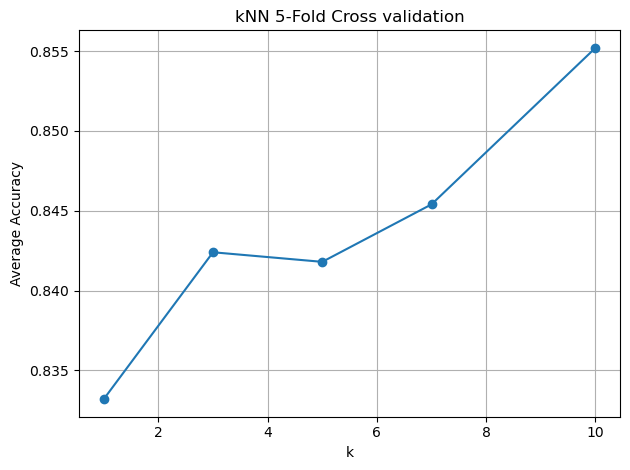

In [112]:
plt.plot(k,avg_accuracy, "o-")
plt.title('kNN 5-Fold Cross validation')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.tight_layout()
plt.grid(True)
plt.show()

#### 2.5

In [113]:
def kNN_prob(trainData: pd.DataFrame, testData: pd.DataFrame, k: int):
    trainX = trainData.iloc[:,:-1].values
    trainY =  trainData.iloc[:,-1].values
    
    testData = testData.values
    predicted_prob = []

    for sample in testData:
        distances = [euclidean_dis(x , sample) for x in trainX]
        nearest_indices = np.argsort(distances)[:k]
        nearest_neighbors = trainY[nearest_indices]
        predicted_prob.append(np.sum(nearest_neighbors==1)/k)
        
    return  predicted_prob

def LogisticRegression_prob(train:pd.DataFrame, test:pd.DataFrame ,lr:float, iterations:int):
    trainX = train.iloc[:,:-1].values
    trainY = train.iloc[:,-1].values
    testX = test.iloc[:,:-1].values

    theta = np.zeros(trainX.shape[1])

    for i in range(iterations):
        z = np.dot(trainX,theta)
        y_hat = sigmoid(z)
        gradient = np.dot(trainX.T, (y_hat-trainY)) /len(y_hat)
        theta -= lr * gradient

    predictions = sigmoid(np.dot(testX,theta))
    return predictions
    


/var/folders/1t/hlxzcgws7rnb1gf_3n3b07140000gn/T/ipykernel_44960/2389384541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


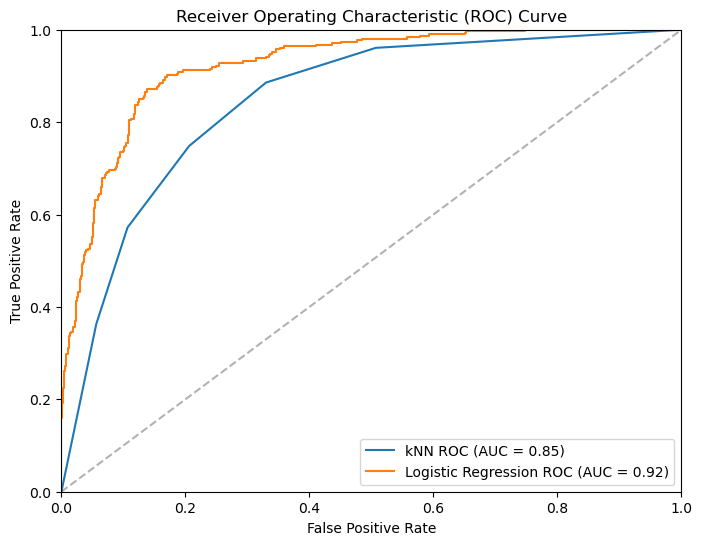

In [114]:
knn_predY = np.array(kNN_prob(emails_df.iloc[0:4000,:],emails_df.iloc[4000:,:-1],5))
logi_predY =LogisticRegression_prob(emails_df.iloc[0:4000,:],emails_df.iloc[4000:,:],0.01,1000)
actual_Y = np.array(emails_df.iloc[4000:,-1])

# Calculate ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(actual_Y, knn_predY)
roc_auc_knn = roc_auc_score(actual_Y, knn_predY)

# Calculate ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(actual_Y, logi_predY)
roc_auc_logistic = roc_auc_score(actual_Y, logi_predY)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'kNN ROC (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression ROC (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha= 0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()